# Mapping

Creating maps is a fun and informative way of handling geospatial data. In this notebook, we will explore basic techniques in mapping with Python.

## A. Geopandas

GeoPandas is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types.

**For this exercise, our goal is to create a heatmap of different metrics.**

To use geopandas, we need to install it first before importing the library. You may read on the geopandas installation guide [here](https://geopandas.org/en/v0.4.0/install.html).

In [1]:
# !pip install geopandas

If the guide above does not work, download and install the dependencies individually by following this [guide](https://towardsdatascience.com/geopandas-installation-the-easy-way-for-windows-31a666b3610f).

In [2]:
# !pip install GDAL-3.4.2-cp38-cp38-win_amd64.whl

In [3]:
# !pip install pyproj-3.2.1-cp38-cp38-win_amd64.whl

In [4]:
# !pip install Fiona-1.8.21-cp38-cp38-win_amd64.whl

In [5]:
# !pip install Shapely-1.8.1.post1-cp38-cp38-win_amd64.whl

In [6]:
# !pip install geopandas-0.10.2-py2.py3-none-any.whl

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import json

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:,.4f}'.format)

Geopandas allows you to read different map file formats such as shapefiles (shp). Geospatial data always have a column that contains coordinates. In this data, it is the `geometry` column. Load the data to check. 

In [8]:
shapefile = gpd.read_file('data/geo/PHGE71FL.SHP')
shapefile.head()

,DHSID,DHSCC,DHSYEAR,DHSCLUST,CCFIPS,ADM1FIPS,ADM1FIPSNA,ADM1SALBNA,ADM1SALBCO,ADM1DHS,ADM1NAME,DHSREGCO,DHSREGNA,SOURCE,URBAN_RURA,LATNUM,LONGNUM,ALT_GPS,ALT_DEM,DATUM,geometry
0,PH201700000386,PH,"2,017.0000",386.0000,NULL,NULL,NULL,NULL,NULL,1.0000,Ilocos,1.0000,Ilocos,GPS,R,18.2719,120.5645,"9,999.0000",17.0000,WGS84,POINT (120.56454 18.27189)
1,PH201700000387,PH,"2,017.0000",387.0000,NULL,NULL,NULL,NULL,NULL,1.0000,Ilocos,1.0000,Ilocos,GPS,U,18.2022,120.5685,"9,999.0000",10.0000,WGS84,POINT (120.56851 18.20219)
2,PH201700000388,PH,"2,017.0000",388.0000,NULL,NULL,NULL,NULL,NULL,1.0000,Ilocos,1.0000,Ilocos,GPS,R,18.0739,120.6911,"9,999.0000",39.0000,WGS84,POINT (120.69111 18.07391)
3,PH201700000389,PH,"2,017.0000",389.0000,NULL,NULL,NULL,NULL,NULL,1.0000,Ilocos,1.0000,Ilocos,GPS,R,18.0610,120.5102,"9,999.0000",13.0000,WGS84,POINT (120.51020 18.06102)
4,PH201700000390,PH,"2,017.0000",390.0000,NULL,NULL,NULL,NULL,NULL,1.0000,Ilocos,1.0000,Ilocos,GPS,R,18.1557,120.6631,"9,999.0000",126.0000,WGS84,POINT (120.66307 18.15569)


When working with geospatial data, although the data looks very similar, the data type is in fact different than the usual DataFrame. 

In [9]:
type(shapefile)

geopandas.geodataframe.GeoDataFrame

In [10]:
shapefile.shape

(1250, 21)

In some shapefiles, the longitude and latitude are already separated. In this case, however, we would still need to separate it using the centroid function.

In [11]:
shapefile["x"] = shapefile.geometry.centroid.x
shapefile["y"] = shapefile.geometry.centroid.y

shapefile.head()

<ipython-input-11-702330a6c344>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shapefile["x"] = shapefile.geometry.centroid.x
<ipython-input-11-702330a6c344>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shapefile["y"] = shapefile.geometry.centroid.y


,DHSID,DHSCC,DHSYEAR,DHSCLUST,CCFIPS,ADM1FIPS,ADM1FIPSNA,ADM1SALBNA,ADM1SALBCO,ADM1DHS,ADM1NAME,DHSREGCO,DHSREGNA,SOURCE,URBAN_RURA,LATNUM,LONGNUM,ALT_GPS,ALT_DEM,DATUM,geometry,x,y
0,PH201700000386,PH,"2,017.0000",386.0000,NULL,NULL,NULL,NULL,NULL,1.0000,Ilocos,1.0000,Ilocos,GPS,R,18.2719,120.5645,"9,999.0000",17.0000,WGS84,POINT (120.56454 18.27189),120.5645,18.2719
1,PH201700000387,PH,"2,017.0000",387.0000,NULL,NULL,NULL,NULL,NULL,1.0000,Ilocos,1.0000,Ilocos,GPS,U,18.2022,120.5685,"9,999.0000",10.0000,WGS84,POINT (120.56851 18.20219),120.5685,18.2022
2,PH201700000388,PH,"2,017.0000",388.0000,NULL,NULL,NULL,NULL,NULL,1.0000,Ilocos,1.0000,Ilocos,GPS,R,18.0739,120.6911,"9,999.0000",39.0000,WGS84,POINT (120.69111 18.07391),120.6911,18.0739
3,PH201700000389,PH,"2,017.0000",389.0000,NULL,NULL,NULL,NULL,NULL,1.0000,Ilocos,1.0000,Ilocos,GPS,R,18.0610,120.5102,"9,999.0000",13.0000,WGS84,POINT (120.51020 18.06102),120.5102,18.0610
4,PH201700000390,PH,"2,017.0000",390.0000,NULL,NULL,NULL,NULL,NULL,1.0000,Ilocos,1.0000,Ilocos,GPS,R,18.1557,120.6631,"9,999.0000",126.0000,WGS84,POINT (120.66307 18.15569),120.6631,18.1557


If you plot this dataframe, you will see the shape of the Philippines with the buondaries of each province.

In [12]:
# !pip install descartes

(0.0, 25.0)

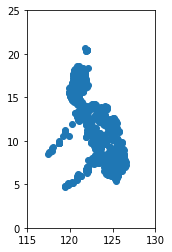

In [13]:
shapefile.plot()

plt.xlim(115,130)
plt.ylim(0,25)

If we want to create a heatmap, we would need the boundaries of the areas of interest and the other points that we want to plot. Since we have already loaded our map, we just need to load the datarame of the informmation we want to map and merge it with the `shapefile`.

In [14]:
df = pd.read_csv('data/PH-HRIR-merged.csv')

<ipython-input-14-3298537f9679>:1: DtypeWarning: Columns (60,70,211,266,330,331,381,445,475,476,477,485,551,570,580,606) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/PH-HRIR-merged.csv')


In [15]:
df.head()

,CASEID,V000,V001,V002,V003,V004,V005,V006,V007,V008,V008A,V009,V010,V011,V012,V013,V014,V015,V016,V018,V019,V019A,V020,V021,V022,V024,V025,V027,V028,V030,V034,V042,V044,V045A,V045B,V045C,V046,V023,V101,V102,V104,V105,V105A,V106,V107,V113,V115,V116,V119,V120,V121,V122,V123,V124,V125,V127,V128,V129,V130,V131,V133,V135,V136,V137,V138,V139,V140,V149,V150,V151,V152,V153,AWFACTT,AWFACTU,AWFACTR,AWFACTE,AWFACTW,V157,V158,V159,V160,V161,V169A,V169B,V170,V171A,V171B,V190,V191,V190A,V191A,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V235,V237,V238,V244,V301,V302A,V312,V313,V315,V316,V317,V318,V319,V320,V321,V322,V325A,V326,V327,V337,V361,V362,V363,V364,V367,V376,V376A,V379,V380,V384A,V384B,V384C,V384D,V393,V393A,V394,V395,V3A00Y,V3A00Z,V3A01,V3A02,V3A03,V3A04,V3A05,V3A06,V3A07,V3A08A,V3A08B,V3A08C,V3A08D,V3A08E,V3A08F,V3A08G,V3A08H,V3A08I,V3A08J,V3A08K,V3A08L,V3A08M,V3A08N,V3A08P,V3A08Q,V3A08R,V3A08S,V3A08T,V3A08U,V3A08V,V3A08X,V3A08Z,V401,V404,V405,V406,V415,V416,V417,V418,V418A,V426,V447,V463A,V463B,V463C,V463D,V463E,V463F,V463G,V463H,V463I,V463X,V463Z,V463AA,V463AB,V464,V465,V467B,V467C,V467D,V467F,V468,V501,V502,V503,V504,V507,V508,V509,V510,V511,V512,V513,V525,V527,V528,V529,V530,V531,V532,V535,V536,V537,V602,V603,V604,V605,V613,V614,V616,V621,V623,V624,V625,V626,V625A,V626A,V627,V628,V629,V632,V632A,V633B,V701,V702,V704,V704A,V705,V714,V714A,V715,V716,V717,V719,V729,V730,V731,V732,V739,V741,V743A,V743B,V743D,V743F,V744A,V744B,V744C,V744D,V744E,V745A,V745B,V746,V750,V751,V754CP,V754DP,V754JP,V754WP,V756,V761,V762,V763A,V763B,V763C,V766A,V766B,V767A,V774A,V774B,V774C,V777A,V781,V783,V784A,V784B,V784C,V784D,V784E,V784F,V784K,V784L,V784M,V784N,V784O,V784X,V791A,V822,V823,V824,V825,V826A,V828,V829,V833A,V834A,V836,V850A,V850B,V852A,V853A,V857A,V857B,V857C,V857D,V858,V801,V802,V803,V804,V805,V811,V812,V813,V814,V815A,V815B,V815C,D005,D101A,D101B,D101C,D101D,D101E,D102,D103A,D103B,D103C,D103D,D103E,D103F,D103G,D104,D105A,D105B,D105C,D105D,D105E,D105F,D105H,D105I,D105J,D105K,D106,D107,D108,D109,D110A,D110B,D110D,D110E,D110F,D110G,D111,D112,D112A,D113,D114,D115B,D115C,D115D,D115F,D115G,D115K,D115L,D115O,D115P,D115Q,D115V,D115W,D115X,D115Y,D115XE,D117A,D118A,D118B,D118C,D118D,D118F,D118G,D118J,D118K,D118L,D118O,D118P,D118Q,D118V,D118W,D118X,D118Y,D118XE,D119H,D119I,D119J,D119K,D119U,D119X,D119Y,D119XB,D119XD,D119XE,D119XF,D119XG,D119XH,D121,D122A,D122B,D122C,D124,D125,D126,D127,D128,D129,D130A,D130B,D130C,S1229AA,S1229AB,S1229AC,S1229BA,S1229BB,S1229BC,S1229BD,S1229BE,S1229BF,S1229BG,S102A,S104BA,S104BB,S104BC,S104BD,S104BZ,S104C,S104P,S108L,S109,S207C,S207D,S208,S239A,S305A,S306A,S308A,S308B,S308C,S705B,S705C,S705D,S717,S723,S815E,S904L,S933,S1107A,S1107B,SEDUC,SPROV,SPEDUC,HHID,HV000,HV001,HV002,HV003,HV004,HV005,HV006,HV007,HV008,HV008A,HV009,HV010,HV012,HV013,HV014,HV015,HV016,HV017,HV018,HV020,HV021,HV022,HV023,HV024,HV025,HV027,HV028,HV030,HV042,HV044,HV045A,HV045B,HV045C,HV046,HV801,HV802,HV803,HV201,HV202,HV201A,HV204,HV205,HV206,HV207,HV208,HV209,HV210,HV211,HV212,HV213,HV214,HV215,HV216,HV217,HV218,HV219,HV220,HV221,HV225,HV226,HV230A,HV230B,HV232,HV232B,HV232Y,HV235,HV237,HV237A,HV237B,HV237C,HV237D,HV237E,HV237F,HV237X,HV237Z,HV238,HV238A,HV241,HV242,HV243A,HV243B,HV243C,HV243D,HV243E,HV244,HV245,HV246,HV246A,HV246B,HV246C,HV246D,HV246E,HV246F,HV246G,HV252,HV270,HV271,HV270A,HV271A,SHUSN,SHSN,SHPROV,SH109B,SH109C,SH121G,SH121H,SH121I,SH121J,SH121K,SH122H,SH123A,SH123B,SH124A,SH201,SH202,SH206,SH207,SH220,SH221A,SH301A,SH301B,SH301C,SH301D,SH301E,SH301F,SH301G,SH301H,SH301I,SH301J,SH301K,SH301L,SH301M,SH301N,SH301O,SH301X,SH301Z,SH302A,SH302B,SH302C,SH302D,SH302E,SH302F,SH302G,SH302H,SH302I,SH302J,SH302K,SH302L,SH302M,SH302N,SH302O,SH302X,SH302Y,SH302Z,SH303,SH304,SH305,SH306,SH307,SH308A,SH308B,SH308C,SH308D,SH308E,SH308F,SH308G,SH308H,SH308X,SH401A,SH401B,SH401C,SH401D,SH401E,SH401F,SH401G,SH401H,SH401I,SH401J,SH401K,SH401L,SH401M,SH401N,

In [16]:
with open('data/PHHR71FL-data-dictionary.json', 'r') as file:
    hr_col_dict = json.load(file)

with open('data/PHIR71FL-data-dictionary.json', 'r') as file:
    ir_col_dict = json.load(file)
    
for col in df.columns:
    try:
        print(f'{col}: {hr_col_dict[col]}')
    except:
        print(f'{col}: {ir_col_dict[col]}')

CASEID: Case Identification
V000: Country code and phase
V001: Cluster number
V002: Household number
V003: Respondent's line number
V004: Ultimate area unit
V005: Women's individual sample weight (6 decimals)
V006: Month of interview
V007: Year of interview
V008: Date of interview (CMC)
V008A: Date of interview Century Day Code (CDC)
V009: Respondent's month of birth
V010: Respondent's year of birth
V011: Date of birth (CMC)
V012: Respondent's current age
V013: Age in 5-year groups
V014: Completeness of age information
V015: Result of individual interview
V016: Day of interview
V018: Row of month of interview
V019: Length of calendar
V019A: Number of calendar columns
V020: Ever-married sample
V021: Primary sampling unit
V022: Sample strata for sampling errors
V024: Region
V025: Type of place of residence
V027: Number of visits
V028: Interviewer identification
V030: Field supervisor
V034: Line number of husband
V042: Household selected for hemoglobin
V044: Selected for Domestic Violence

Our files are now loaded! Let's try to add information to our map. To do this, our goal is to be able to merge the two datasets. According to DHS Program's notes, we can merge it using the cluster label `HV001`.

In [17]:
# Check province
print(f'Df: {df["HV001"].nunique()}')
print(f'Shapefile: {shapefile["DHSCLUST"].nunique()}')

Df: 1248
Shapefile: 1250


Which clusters are not in the df?

In [18]:
miss_clust = [x for x in shapefile["DHSCLUST"].unique() if x not in df["HV001"].unique()]
miss_clust

[301.0, 320.0]

In what regions do these clusters belong to?

In [19]:
shapefile[shapefile['DHSCLUST'].isin(miss_clust)]['ADM1NAME'].unique()

array(['National Capital'], dtype=object)

Let's create a dataframe with summary statistics per cluster...

In [20]:
cluster_df = df.groupby('HV001', as_index = False).agg(size=('CASEID','size'), total_births=('V201', 'sum'), 
                                                       ave_age_1birth=('V212','mean'))

Now that the data is clean, we can merge them together. 

In [21]:
# Complete the code
merged_data = pd.merge(shapefile, cluster_df, left_on = 'DHSCLUST', right_on = 'HV001')
merged_data

,DHSID,DHSCC,DHSYEAR,DHSCLUST,CCFIPS,ADM1FIPS,ADM1FIPSNA,ADM1SALBNA,ADM1SALBCO,ADM1DHS,ADM1NAME,DHSREGCO,DHSREGNA,SOURCE,URBAN_RURA,LATNUM,LONGNUM,ALT_GPS,ALT_DEM,DATUM,geometry,x,y,HV001,size,total_births,ave_age_1birth
0,PH201700000386,PH,"2,017.0000",386.0000,NULL,NULL,NULL,NULL,NULL,1.0000,Ilocos,1.0000,Ilocos,GPS,R,18.2719,120.5645,"9,999.0000",17.0000,WGS84,POINT (120.56454 18.27189),120.5645,18.2719,386.0000,21,25.0000,26.1000
1,PH201700000387,PH,"2,017.0000",387.0000,NULL,NULL,NULL,NULL,NULL,1.0000,Ilocos,1.0000,Ilocos,GPS,U,18.2022,120.5685,"9,999.0000",10.0000,WGS84,POINT (120.56851 18.20219),120.5685,18.2022,387.0000,35,71.0000,22.4286
2,PH201700000388,PH,"2,017.0000",388.0000,NULL,NULL,NULL,NULL,NULL,1.0000,Ilocos,1.0000,Ilocos,GPS,R,18.0739,120.6911,"9,999.0000",39.0000,WGS84,POINT (120.69111 18.07391),120.6911,18.0739,388.0000,28,36.0000,22.8750
3,PH201700000389,PH,"2,017.0000",389.0000,NULL,NULL,NULL,NULL,NULL,1.0000,Ilocos,1.0000,Ilocos,GPS,R,18.0610,120.5102,"9,999.0000",13.0000,WGS84,POINT (120.51020 18.06102),120.5102,18.0610,389.0000,9,15.0000,26.5000
4,PH201700000390,PH,"2,017.0000",390.0000,NULL,NULL,NULL,NULL,NULL,1.0000,Ilocos,1.0000,Ilocos,GPS,R,18.1557,120.6631,"9,999.0000",126.0000,WGS84,POINT (120.66307 18.15569),120.6631,18.1557,390.0000,21,26.0000,23.3333
5,PH201700000391,PH,"2,017.0000",391.0000,NULL,NULL,NULL,NULL,NULL,1.0000,Ilocos,1.0000,Ilocos,GPS,R,18.5981,120.8100,"9,999.0000",7.0000,WGS84,POINT (120.80996 18.59807),120.8100,18.5981,391.0000,22,44.0000,20.2778
6,PH201700000392,PH,"2,017.0000",392.0000,NULL,NULL,NULL,NULL,NULL,1.0000,Ilocos,1.0000,Ilocos,GPS,R,18.0644,120.5625,"9,999.0000",24.0000,WGS84,POINT (120.56254 18.06444),120.5625,18.0644,392.0000,21,31.0000,25.4167
7,PH201700000393,PH,"2,017.0000",393.0000,NULL,NULL,NULL,NULL,NULL,1.0000,Ilocos,1.0000,Ilocos,GPS,R,18.0055,120.6866,"9,999.0000",53.0000,WGS84,POINT (120.68663 18.00554),120.6866,18.0055,393.0000,24,55.0000,21.6667
8,PH201700000394,PH,"2,017.0000",394.0000,NULL,NULL,NULL,NULL,NULL,1.0000,Ilocos,1.0000,Ilocos,GPS,R,18.0719,120.6902,"9,999.0000",29.0000,WGS84,POINT (120.69017 18.07191),120.6902,18.0719,394.0000,16,23.0000,21.5000
9,PH201700000395,PH,"2,017.0000",395.0000,NULL,NULL,NULL,NULL,NULL,1.0000,Ilocos,1.0000,Ilocos,GPS,R,18.1915,120.5414,"9,999.0000",21.0000,WGS84,POINT (120.54144 18.19151),120.5414,18.1915,395.0000,24,44.0000,20.6667


In [22]:
type(merged_data)

geopandas.geodataframe.GeoDataFrame

Once you have the final dataframe, plotting in geopandas is easy. You simply need to add arguments to change the colors.

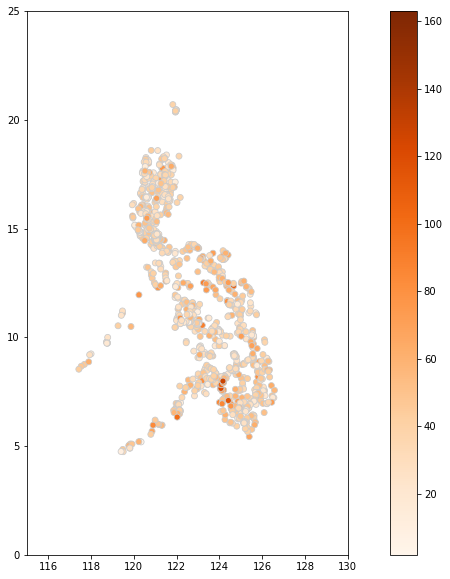

In [23]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'total_births'
# set the range for the choropleth
vmin, vmax = merged_data[variable].min(), merged_data[variable].max()

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(15, 10))

# Complete the code
merged_data.plot(column=variable, cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8', vmin=vmin, vmax=vmax)

plt.xlim(115,130)
plt.ylim(0,25)

sm = plt.cm.ScalarMappable(cmap='Oranges', norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = fig.colorbar(sm)

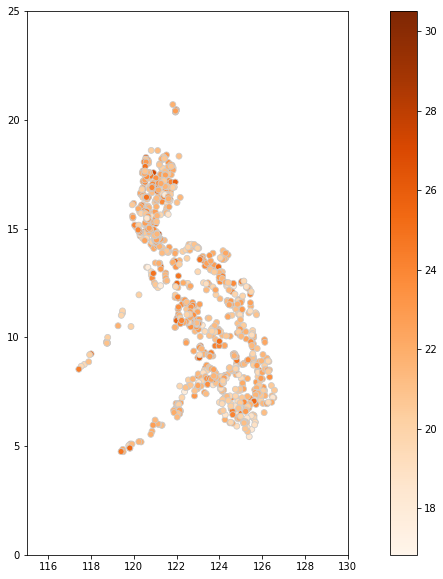

In [24]:
# Complete the code
# set a variable that will call whatever column we want to visualise on the map
variable = "ave_age_1birth"
# set the range for the choropleth
vmin, vmax = merged_data[ variable].min(), merged_data[variable].max()
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(15, 10))

merged_data.plot(column=variable, cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8', vmin=vmin, vmax=vmax)

plt.xlim(115,130)
plt.ylim(0,25)

sm = plt.cm.ScalarMappable(cmap='Oranges', norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = fig.colorbar(sm)

#### <font color = 'pink'>Practice:</font> Try to use another shapefile to visualize the summary statistics.
The shapefile provided by the DHS take the shape of the clusters. What if we use the provinces shapefile?

In [25]:
shapefile2 = gpd.read_file('data/geo/provinces/Provinces.shp')
shapefile2.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,NL_NAME_1,VARNAME_1,TYPE_1,ENGTYPE_1,PROVINCE,REGION,geometry
0,177,PHL,Philippines,1,Abra,None,None,Lalawigan|Probinsya,Province,Abra,Cordillera Administrative Region (CAR),"POLYGON ((120.96795 17.95706, 120.97803 17.949..."
1,177,PHL,Philippines,2,Agusan del Norte,None,None,Lalawigan|Probinsya,Province,Agusan del Norte,Caraga (Region XIII),"POLYGON ((125.57724 9.45679, 125.59687 9.45509..."
2,177,PHL,Philippines,3,Agusan del Sur,None,None,Lalawigan|Probinsya,Province,Agusan del Sur,Caraga (Region XIII),"POLYGON ((125.91087 8.85625, 125.91461 8.85211..."
3,177,PHL,Philippines,4,Aklan,None,None,Lalawigan|Probinsya,Province,Aklan,Western Visayas (Region VI),"MULTIPOLYGON (((122.43667 11.59833, 122.43667 ..."
4,177,PHL,Philippines,5,Albay,None,None,Lalawigan|Probinsya,Province,Albay,Bicol Region (Region V),"MULTIPOLYGON (((123.28764 13.04923, 123.28686 ..."


In [26]:
shapefile2["x"] = shapefile2.geometry.centroid.x
shapefile2["y"] = shapefile2.geometry.centroid.y

shapefile2.head()

<ipython-input-26-e9b10f7fd4e5>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shapefile2["x"] = shapefile2.geometry.centroid.x
<ipython-input-26-e9b10f7fd4e5>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shapefile2["y"] = shapefile2.geometry.centroid.y


,ID_0,ISO,NAME_0,ID_1,NAME_1,NL_NAME_1,VARNAME_1,TYPE_1,ENGTYPE_1,PROVINCE,REGION,geometry,x,y
0,177,PHL,Philippines,1,Abra,None,None,Lalawigan|Probinsya,Province,Abra,Cordillera Administrative Region (CAR),"POLYGON ((120.96795 17.95706, 120.97803 17.949...",120.8055,17.5792
1,177,PHL,Philippines,2,Agusan del Norte,None,None,Lalawigan|Probinsya,Province,Agusan del Norte,Caraga (Region XIII),"POLYGON ((125.57724 9.45679, 125.59687 9.45509...",125.5229,9.0145
2,177,PHL,Philippines,3,Agusan del Sur,None,None,Lalawigan|Probinsya,Province,Agusan del Sur,Caraga (Region XIII),"POLYGON ((125.91087 8.85625, 125.91461 8.85211...",125.7573,8.4034
3,177,PHL,Philippines,4,Aklan,None,None,Lalawigan|Probinsya,Province,Aklan,Western Visayas (Region VI),"MULTIPOLYGON (((122.43667 11.59833, 122.43667 ...",122.2476,11.6099
4,177,PHL,Philippines,5,Albay,None,None,Lalawigan|Probinsya,Province,Albay,Bicol Region (Region V),"MULTIPOLYGON (((123.28764 13.04923, 123.28686 ...",123.6155,13.2113


In [27]:
# Unique province values in shapefile
sorted(shapefile2['PROVINCE'].unique())

['Abra',
 'Agusan del Norte',
 'Agusan del Sur',
 'Aklan',
 'Albay',
 'Antique',
 'Apayao',
 'Aurora',
 'Basilan',
 'Bataan',
 'Batanes',
 'Batangas',
 'Benguet',
 'Biliran',
 'Bohol',
 'Bukidnon',
 'Bulacan',
 'Cagayan',
 'Camarines Norte',
 'Camarines Sur',
 'Camiguin',
 'Capiz',
 'Catanduanes',
 'Cavite',
 'Cebu',
 'Compostela Valley',
 'Davao Oriental',
 'Davao del Norte',
 'Davao del Sur',
 'Dinagat Islands',
 'Eastern Samar',
 'Guimaras',
 'Ifugao',
 'Ilocos Norte',
 'Ilocos Sur',
 'Iloilo',
 'Isabela',
 'Kalinga',
 'La Union',
 'Laguna',
 'Lanao del Norte',
 'Lanao del Sur',
 'Leyte',
 'Maguindanao',
 'Marinduque',
 'Masbate',
 'Metropolitan Manila',
 'Misamis Occidental',
 'Misamis Oriental',
 'Mountain Province',
 'Negros Occidental',
 'Negros Oriental',
 'North Cotabato',
 'Northern Samar',
 'Nueva Ecija',
 'Nueva Vizcaya',
 'Occidental Mindoro',
 'Oriental Mindoro',
 'Palawan',
 'Pampanga',
 'Pangasinan',
 'Quezon',
 'Quirino',
 'Rizal',
 'Romblon',
 'Samar',
 'Sarangani',
 

In [28]:
# Unique province values in df
sorted(df['SPROV'].unique())

['Abra',
 'Agusan del norte',
 'Agusan del sur',
 'Aklan',
 'Albay',
 'Antique',
 'Aurora',
 'Basilan',
 'Bataan',
 'Batanes',
 'Batangas',
 'Benguet',
 'Biliran',
 'Bohol',
 'Bukidnon',
 'Bulacan',
 'Cagayan',
 'Caloocan/Malabon/Navotas/Valenzuela',
 'Camarines norte',
 'Camarines sur',
 'Camiguin',
 'Catanduanes',
 'Cavite',
 'Cebu (inc cities)',
 'Compostella valley',
 'Cotabato (north)',
 'Davao del norte',
 'Davao del sur',
 'Davao occidental',
 'Davao oriental',
 'Dinagat islands',
 'Eastern samar',
 'Guimaras',
 'Ifugao',
 'Ilocos norte',
 'Ilocos sur',
 'Iloilo',
 'Isabela',
 'Isabela city',
 'Kalinga',
 'La union',
 'Laguna',
 'Lanao del norte',
 'Lanao del sur',
 'Las Pinas/Makati/Muntinlupa/Paranaque/Pasay/Taguig/Pateros',
 'Leyte',
 'Maguindanao',
 'Mandaluyong/Marikina/Pasig/San Juan/Quezon City',
 'Manila',
 'Marinduque',
 'Masbate',
 'Misamis occidental',
 'Misamis oriental',
 'Mountain province',
 'Negros occidental',
 'Negros oriental',
 'Northern samar',
 'Nueva ecija

In [29]:
# Standardizing syntax of province columns for comparison
shp_list = [x.title() for x in shapefile2["PROVINCE"].unique()]
df_list = [x.title() for x in df["SPROV"].unique()]

In [30]:
# Which province values in the shapefile are not in the df? 
display([x for x in shp_list if x not in df_list])
display([x for x in df_list if x not in shp_list])

['Cebu',
 'Compostela Valley',
 'Metropolitan Manila',
 'North Cotabato',
 'Samar',
 'Shariff Kabunsuan']

['Isabela City',
 'Cotabato City',
 'Caloocan/Malabon/Navotas/Valenzuela',
 'Las Pinas/Makati/Muntinlupa/Paranaque/Pasay/Taguig/Pateros',
 'Mandaluyong/Marikina/Pasig/San Juan/Quezon City',
 'Manila',
 'Cebu (Inc Cities)',
 'Samar (Western)',
 'Compostella Valley',
 'Davao Occidental',
 'Cotabato (North)']

In [31]:
# Recode the province columns
df_recode = {'Isabela City' : 'Basilan',
 'Cotabato City': 'Maguindanao',
 'Caloocan/Malabon/Navotas/Valenzuela': 'Metropolitan Manila',
 'Las Pinas/Makati/Muntinlupa/Paranaque/Pasay/Taguig/Pateros': 'Metropolitan Manila',
 'Mandaluyong/Marikina/Pasig/San Juan/Quezon City': 'Metropolitan Manila',
 'Manila': 'Metropolitan Manila',
 'Cebu (Inc Cities)':'Cebu',
 'Samar (Western)':'Samar',
 'Compostella Valley':'Compostela Valley',
 'Cotabato (North)':'North Cotabato'
}

shp_recode = { 'Shariff Kabunsuan': 'Davao Occidental'}

df['SPROV_'] = df['SPROV'].apply(lambda x: x.title()).replace(df_recode)
shapefile2['PROVINCE_'] =  shapefile2['PROVINCE'].apply(lambda x: x.title()).replace(shp_recode)

In [32]:
# Creating a province df
province_df = df.groupby('SPROV_', as_index = False).agg(size=('CASEID','size'), total_births=('V201', 'sum'), 
                                                       ave_age_1birth=('V212','mean'))

# Merging shapefile2 with province df
merged_data2 = pd.merge(shapefile2, province_df, left_on = 'PROVINCE_', right_on = 'SPROV_')
merged_data2

,ID_0,ISO,NAME_0,ID_1,NAME_1,NL_NAME_1,VARNAME_1,TYPE_1,ENGTYPE_1,PROVINCE,REGION,geometry,x,y,PROVINCE_,SPROV_,size,total_births,ave_age_1birth
0,177,PHL,Philippines,1,Abra,None,None,Lalawigan|Probinsya,Province,Abra,Cordillera Administrative Region (CAR),"POLYGON ((120.96795 17.95706, 120.97803 17.949...",120.8055,17.5792,Abra,Abra,223,434.0000,22.2740
1,177,PHL,Philippines,2,Agusan del Norte,None,None,Lalawigan|Probinsya,Province,Agusan del Norte,Caraga (Region XIII),"POLYGON ((125.57724 9.45679, 125.59687 9.45509...",125.5229,9.0145,Agusan Del Norte,Agusan Del Norte,425,770.0000,21.7280
2,177,PHL,Philippines,3,Agusan del Sur,None,None,Lalawigan|Probinsya,Province,Agusan del Sur,Caraga (Region XIII),"POLYGON ((125.91087 8.85625, 125.91461 8.85211...",125.7573,8.4034,Agusan Del Sur,Agusan Del Sur,244,510.0000,21.9758
3,177,PHL,Philippines,4,Aklan,None,None,Lalawigan|Probinsya,Province,Aklan,Western Visayas (Region VI),"MULTIPOLYGON (((122.43667 11.59833, 122.43667 ...",122.2476,11.6099,Aklan,Aklan,235,416.0000,23.2345
4,177,PHL,Philippines,5,Albay,None,None,Lalawigan|Probinsya,Province,Albay,Bicol Region (Region V),"MULTIPOLYGON (((123.28764 13.04923, 123.28686 ...",123.6155,13.2113,Albay,Albay,262,480.0000,22.9615
5,177,PHL,Philippines,6,Antique,None,None,Lalawigan|Probinsya,Province,Antique,Western Visayas (Region VI),"MULTIPOLYGON (((121.92085 10.42076, 121.92107 ...",122.0693,11.1269,Antique,Antique,228,450.0000,23.3404
6,177,PHL,Philippines,7,Apayao,None,None,Lalawigan|Probinsya,Province,Apayao,Cordillera Administrative Region (CAR),"POLYGON ((121.33075 17.85327, 121.32558 17.845...",121.1970,18.0923,Apayao,Apayao,219,492.0000,21.6467
7,177,PHL,Philippines,8,Aurora,None,None,Lalawigan|Probinsya,Province,Aurora,Central Luzon (Region III),"MULTIPOLYGON (((121.57475 15.59574, 121.57412 ...",121.7046,15.9269,Aurora,Aurora,232,463.0000,21.7320
8,177,PHL,Philippines,9,Basilan,None,None,Lalawigan|Probinsya,Province,Basilan,Autonomous Region of Muslim Mindanao (ARMM),"MULTIPOLYGON (((121.96861 6.28222, 121.96806 6...",122.0214,6.5794,Basilan,Basilan,457,870.0000,22.1756
9,177,PHL,Philippines,10,Bataan,None,None,Lalawigan|Probinsya,Province,Bataan,Central Luzon (Region III),"MULTIPOLYGON (((120.62363 14.36788, 120.62368 ...",120.4493,14.6645,Bataan,Bataan,283,458.0000,21.8580


In [33]:
# merged_data2.to_file('data/geo/map-clean.shp', index=False)

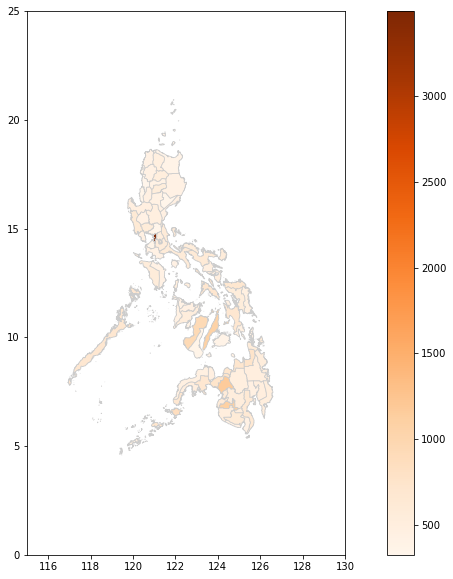

In [34]:
variable = 'total_births'
vmin, vmax = merged_data2[variable].min(), merged_data2[variable].max()

fig, ax = plt.subplots(1, figsize=(15, 10))

merged_data2.plot(column=variable, cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8', vmin=vmin, vmax=vmax)

plt.xlim(115,130)
plt.ylim(0,25)

sm = plt.cm.ScalarMappable(cmap='Oranges', norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = fig.colorbar(sm)

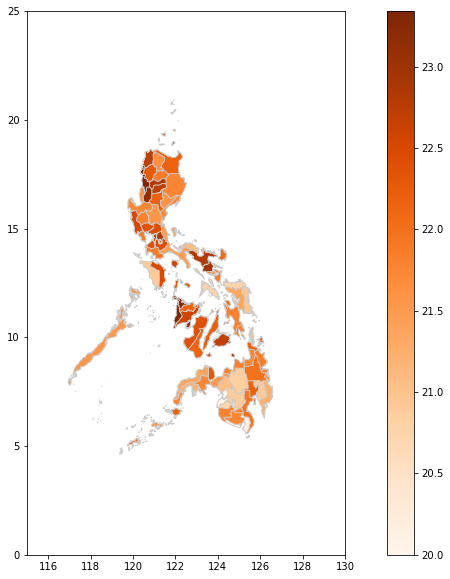

In [35]:
variable = 'ave_age_1birth'
vmin, vmax = merged_data2[variable].min(), merged_data2[variable].max()

fig, ax = plt.subplots(1, figsize=(15, 10))

merged_data2.plot(column=variable, cmap='Oranges', linewidth=0.8, ax=ax, edgecolor='0.8', vmin=vmin, vmax=vmax)

plt.xlim(115,130)
plt.ylim(0,25)

sm = plt.cm.ScalarMappable(cmap='Oranges', norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = fig.colorbar(sm)

## Folium

Folium makes it easy to visualize data that’s been manipulated in Python on an interactive leaflet map.

Again, let's import the library first.

In [36]:
# !pip install folium

In [37]:
import folium

An interesting feature of folium is that it already has maps built-in the package. When you type, `folium.Map`, it will prepare for you a basemap that you can edit.

In [38]:
# Coordinates to show
map_center = [14.583197, 121.051538]

# Styling the map
mymap = folium.Map(location=map_center, height=700, width=1000, tiles="OpenStreetMap", zoom_start=14)
mymap

To add points to the map, simply use `folium.Marker` and `.add_to()`

In [39]:
# Coordinate of point
marker_coords = [14.583197, 121.051538]

# Overlay point in map
folium.Marker(marker_coords).add_to(mymap)
mymap

Let's explore adding more than one point. Let's try to plot centroids of the different provinces in the Philippines. 

***Be careful though! Adding too many points can crash your notebook***

In [40]:
cluster_centers = merged_data[merged_data['DHSREGNA']=='Cagayan Valley'].copy()

Let's loop the values inside the data and add it to the map one by one.

In [41]:
# Complete the code
for i in np.arange(len(cluster_centers)):
    lat = cluster_centers["y"].values[i]
    lon = cluster_centers["x"].values[i]
    name = cluster_centers["HV001"].values[i]
    folium.Marker([lat, lon],  popup=folium.Popup(str(name), show = True)).add_to(mymap)
    
mymap

When we have multiple points, there is a tendency for them to overlap depending on your zoom level. One way to handle this is to cluster the points together. You can import `MarkerCluster` for this.

In [42]:
from folium.plugins import MarkerCluster
mymap_cluster = folium.Map(location=map_center, height=700, width=1000, tiles="OpenStreetMap", zoom_start=13)
marker_cluster = MarkerCluster().add_to(mymap_cluster)

The syntax for cluster is very similar to the previous map. However, instead of adding it to the map directly, we add it to the `MarkerCluster` variable.

In [43]:
# Complete the code

for i in np.arange(len(cluster_centers)):
    lat = cluster_centers["y"].values[i]
    lon = cluster_centers["x"].values[i]
    name = cluster_centers["HV001"].values[i]
    folium.Marker([lat, lon], popup=name).add_to(marker_cluster)
    
mymap_cluster

There you have it! Try to do the same but for any subset of the total data (e.g. for select regions only).